In [8]:
# reload notebook
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import os 
import sys 
from scipy import ndimage
os.environ["MUJOCO_GL"] = "egl"
# from changepoint_aug.env_utils import create_single_env, make_video_from_trajectory

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [154]:
from typing import List
import numpy as np

def create_maze_map(
    width: int,
    height: int,
    wall_y: int = None,
    wall_locs: List[List[int]] = None,
):
    # create a border of walls around the maze
    maze_map = []

    if wall_y is None:
        # pick randomly between 2 and height - 2
        wall_y = np.random.randint(2, height - 2)

    if wall_locs is None:
        wall_locs = []
        # pick two randomly between 1 and width - 1, no replacement
        # make sure they are not consecutive
        # pick the first one
        wall_x = np.random.randint(1, width - 1)
        # pick the second one, making sure it's not the same as the first and not consecutive
        wall_x2 = np.random.randint(1, width - 1)
        while wall_x2 == wall_x or abs(wall_x2 - wall_x) == 1:
            wall_x2 = np.random.randint(1, width - 1)
        
        wall_locs.append([wall_y, wall_x])
        wall_locs.append([wall_y, wall_x2])


        # wall_x = np.random.choice(np.arange(1, width - 1), 2, replace=False)
        # wall_locs.append([wall_y, wall_x[0]])
        # wall_locs.append([wall_y, wall_x[1]])

    for i in range(height):
        row = []
        for j in range(width):
            if i == 0 or i == height - 1 or j == 0 or j == width - 1:
                row.append(1)
            else:
                row.append(0)
        maze_map.append(row)

    for j in range(1, width - 1):
        maze_map[wall_y][j] = 1

    for loc in wall_locs:
        maze_map[loc[0]][loc[1]] = 0

    # change everything above wall to be resets 'r' and everything below to be 'g'
    if np.random.rand() < 0.5:
        above = "r"
    else:
        above = "g"
    for i in range(wall_y):
        for j in range(width):
            if maze_map[i][j] == 0:
                if above == "r":
                    maze_map[i][j] = "r"
                else:
                    maze_map[i][j] = "g"

    for i in range(wall_y + 1, height):
        for j in range(width):
            if maze_map[i][j] == 0:
                if above == "r":
                    maze_map[i][j] = "g"
                else:
                    maze_map[i][j] = "r"

    return maze_map, wall_y, wall_locs

create_maze_map(7, 7, None, None)

([[1, 1, 1, 1, 1, 1, 1],
  [1, 'r', 'r', 'r', 'r', 'r', 1],
  [1, 'r', 'r', 'r', 'r', 'r', 1],
  [1, 1, 1, 0, 1, 0, 1],
  [1, 'g', 'g', 'g', 'g', 'g', 1],
  [1, 'g', 'g', 'g', 'g', 'g', 1],
  [1, 1, 1, 1, 1, 1, 1]],
 3,
 [[3, 3], [3, 5]])

{'observation': array([ 0.18798904, -1.1846554 ,  0.        ,  0.        ]), 'achieved_goal': array([ 0.18798904, -1.1846554 ]), 'desired_goal': array([-0.76790201,  1.99150317]), 'meta': [2, 2, 1, 2, 3]}


/scr/aliang80/miniconda3/envs/jax2/lib/python3.11/site-packages/gymnasium/utils/passive_env_checker.py:131: UserWarning: WARN: The obs returned by the `reset()` method was expecting a numpy array, actual type: <class 'list'>
  logger.warn(
/scr/aliang80/miniconda3/envs/jax2/lib/python3.11/site-packages/gymnasium/spaces/box.py:240: UserWarning: WARN: Casting input x to numpy array.
  gym.logger.warn("Casting input x to numpy array.")
/scr/aliang80/miniconda3/envs/jax2/lib/python3.11/site-packages/gymnasium/utils/passive_env_checker.py:131: UserWarning: WARN: The obs returned by the `step()` method was expecting a numpy array, actual type: <class 'list'>
  logger.warn(


({'observation': array([ 0.1870264 , -1.18317713, -0.09626418,  0.14782632]),
  'achieved_goal': array([ 0.1870264 , -1.18317713]),
  'desired_goal': array([-0.76790201,  1.99150317]),
  'meta': [2, 2, 1, 2, 3]},
 0.036327153619452573,
 False,
 False,
 {'success': False})

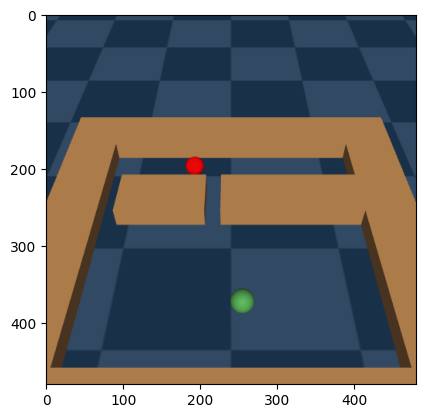

In [166]:
import gymnasium as gym
map = [[1, 1, 1, 1, 1, 1, 1],
        [1, "g", "g", "g", "g", "g", 1],
        [1, 0, 0, 0, 0, 0, 1],
        [1, 1, 0, 1, 0, 1, 1],
        [1, 0, 0, 0, 0, 0, 1],
        [1, "r", "r", "r", "r", "r", 1],
        [1, 1, 1, 1, 1, 1, 1]]

env = gym.make('PointMaze_UMazeDense-v3', 
              maze_map=map, 
              continuing_task=False, 
              reset_target=False, 
              render_mode="rgb_array", 
              max_episode_steps=1000,
              reward_type="dense")
obs, _ = env.reset()
print(obs)
img = env.render()
plt.imshow(img)

env.step(env.action_space.sample())

In [172]:
env.step(env.action_space.sample())

({'observation': array([ 0.15782923, -1.17445805, -0.80168755,  0.06824638]),
  'achieved_goal': array([ 0.15782923, -1.17445805]),
  'desired_goal': array([-0.76790201,  1.99150317]),
  'meta': [2, 2, 1, 2, 3]},
 0.036937489276246786,
 False,
 False,
 {'success': False})

0.30315529862538043 False False
0.3018224624975105 False False
0.3010543416933417 False False
0.3004216844430674 False False
0.300478565090252 False False
0.3000451016385244 False False
0.3000454262654266 False False
0.2993714789691338 False False
0.2986277972696191 False False
0.29782453073888243 False False
0.2973757911388505 False False
0.2966371201569173 False False
0.2961653000764808 False False
0.295641979971474 False False
0.2956944195367383 False False
0.29570419613059296 False False
0.29597557596637847 False False
0.29621930295513205 False False
0.29619603062432676 False False
0.2961463927497576 False False
0.29545979737497563 False False
0.2945414054494179 False False
0.29328900175241673 False False
0.292028333446668 False False
0.29141127718969345 False False
0.2913182886681865 False False
0.290783285200371 False False
0.2923485792256049 False False
0.2941046542953517 False False
0.29547992724977157 False False
0.2972591899938578 False False
0.2985540048675777 False False
0.

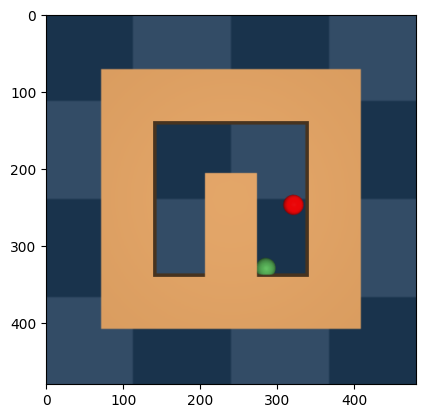

In [32]:
import gymnasium
import changepoint_aug.envs
# from changepoint_aug.envs.point_maze_v2 import PointMazeEnv
from gymnasium import envs
from pprint import pprint
# pprint(list(envs.registry.keys()))
# registry = EnvRegistry()
env = gymnasium.make("PointMazeSlit-v0", max_episode_steps=100, render_mode="rgb_array", reward_type="dense")

env.reset(seed=0)
for _ in range(100):
    _, reward, done, truncated, _ = env.step(env.action_space.sample())
    print(reward, done, truncated)

env._max_episode_steps
img = env.render()
plt.imshow(img)

In [6]:
import numpy as np
from envs.maze import Maze 
from envs.point_maze_v2 import PointMazeEnv
EMPTY_MAZE = [
    [1, 1, 1, 1, 1],
    [1, 0, 0, 0, 1],
    [1, 1, 1, 0, 1],
    [1, 0, 0, 0, 1],
    [1, 1, 1, 1, 1],
]
# env = Maze(EMPTY_MAZE, 1.0, 2)
# env.render()
env = PointMazeEnv(render_mode="rgb_array")
# obs, info = env.reset(seed=3)
# print(obs)
# print(env.maze.cell_xy_to_rowcol(obs['observation']))
# print(env.maze.cell_xy_to_rowcol(obs['desired_goal']))

# print(env.step(env.action_space.sample()))

# collect some trajectory data and save into pickle 
trajs = []

num_episodes = 50
for _ in range(num_episodes):
    traj = []
    obs = env.reset(seed=1)
    for _ in range(100):
        action = env.action_space.sample()+0.3
        obs, rew, done, truncated, info = env.step(action)
        traj.append(obs)
    trajs.append(traj)

import pickle
with open("../online_rl_diffusion/trajs.pkl", "wb") as f:
    pickle.dump(trajs, f)

# obs, info = env.reset(seed=1)
# agent_pos = obs["observation"][0:2]
# target_pos = obs["desired_goal"][0:2]

Box(-inf, inf, (4,), float64)


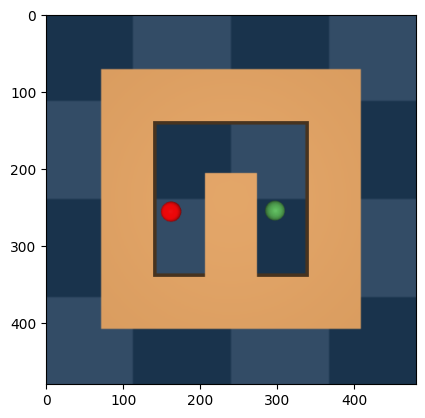

In [53]:
env = PointMazeEnv(render_mode="rgb_array")
obs, _ = env.reset(seed=0)
# img = env.render()
# plt.imshow(img)
obs, _ = env.reset()
obs, _ = env.reset()
img = env.render()
plt.imshow(img)
print(env.observation_space["observation"])

# env.reset(seed=0)
# env.reset_to_pos(seed=3, agent_pos=obs["observation"][0:2], target_pos=obs["desired_goal"][0:2])
# img = env.render()
# plt.imshow(img)

In [3]:
env.action_space

Box(-1.0, 1.0, (2,), float32)

In [4]:
with open("../online_rl_diffusion/trajs.pkl", "rb") as f:
    trajs = pickle.load(f)

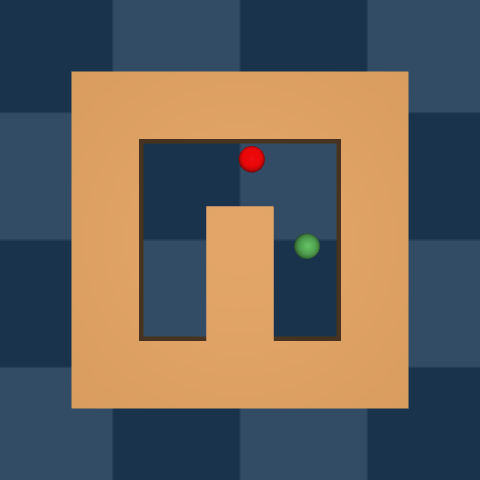

In [8]:
# render a traj 
traj = trajs[1]
imgs = []
for i in range(len(traj)):
    # print(i, traj[i]["observation"], traj[i]["desired_goal"])
    env.reset_to_pos(seed=0, agent_pos=traj[i]["observation"][0:2], target_pos=traj[i]["desired_goal"][0:2])
    img = env.render()
    imgs.append(img)

# save to video
import imageio
imageio.mimsave('traj.gif', imgs, fps=10)

# show here 
from IPython.display import Image
Image(filename='traj.gif')

[-0.09408427 -1.03833678  0.          0.        ]


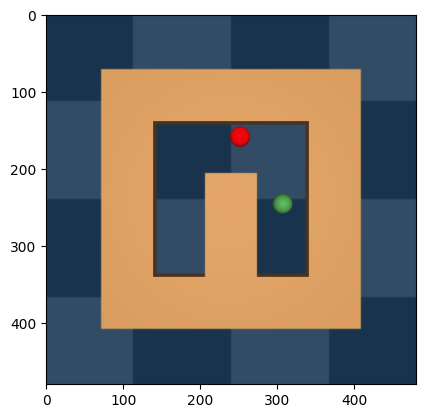

In [20]:
obs, info = env.reset_to_pos(seed=0, agent_pos=agent_pos,target_pos=target_pos)
img = env.render()
plt.imshow(img)

No module named 'mjrl'
No module named 'flow'
No module named 'carla'
/scr/aliang80/miniconda3/lib/python3.11/site-packages/gym/envs/registration.py:415: UserWarning: WARN: The `registry.env_specs` property along with `EnvSpecTree` is deprecated. Please use `registry` directly as a dictionary instead.
  logger.warn(
pybullet build time: Nov 28 2023 23:48:36
/scr/aliang80/miniconda3/lib/python3.11/site-packages/gym/core.py:200: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(
/scr/aliang80/miniconda3/lib/python3.11/site-packages/gymnasium/envs/mujoco/mujoco_env.py:211: DeprecationWarning: WARN: This version of the mujoco environments depends on the mujoco-py bindings, which are no longer maintained and may stop working. Please upgrade to the v4 versions of the environments (which depend on the mujoco python bindings instead), unless you are trying to precisely replicat

None 2 5 None
start locations:  [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7)]
None 5 4 None
start locations:  [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7)]
[7. 7.]
starting pos:  [6.97667378 6.98169464]
[[0.         0.         0.        ]
 [6.97667378 6.98169464 0.        ]] [6.97667378 6.98169464]
[[0. 0. 0.]
 [0. 0. 0.]]
Found 8 GPUs for rendering. Using device 0.


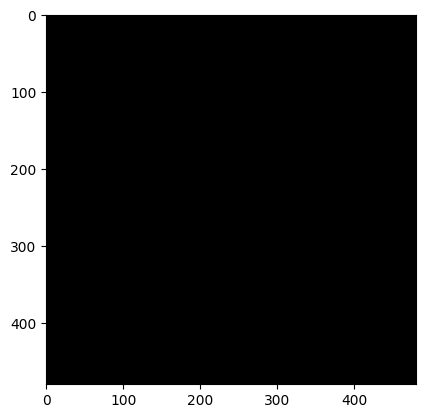

In [2]:
from envs.point_maze import PointMazeEnv
from ml_collections import ConfigDict

env = PointMazeEnv(
    env_config=ConfigDict(
        dict(
            max_episode_length=100,
            randomize_slit_location=True,
            sparse_reward=False,
            no_reward=False,
            grid_dist_solve_thresh=0.05, 
            use_grid_dist=True,
            maze_width=7,
            maze_height=7,
            randomize_wall_y=True,
            randomize_wall_x=False,
            randomize_wall_thickness=False,
            randomize_vh_wall=False,
            slit_size=0.15,
            noisy_transition_dynamics=False,
            vision_based=False,
            add_vel_noise=False,
            goal_conditioned=True,
            reset_target=True,
            seed=5
        )
    )
)
obs = env.reset()
print(env.data.site_xpos, env.data.qpos)
# print(env.sim)
env.data.site_xpos[0] = [2.0, 2.0, 1.5]
# env.model.site_pos[0] = [1.0, 1.0, 0.5]
print(env.model.site_pos)
env.step(env.action_space.sample())
img = env.render()
plt.imshow(img)

In [213]:
dir(env.model)

['__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_address',
 'actuator',
 'actuator_acc0',
 'actuator_actadr',
 'actuator_actearly',
 'actuator_actlimited',
 'actuator_actnum',
 'actuator_actrange',
 'actuator_biasprm',
 'actuator_biastype',
 'actuator_cranklength',
 'actuator_ctrllimited',
 'actuator_ctrlrange',
 'actuator_dynprm',
 'actuator_dyntype',
 'actuator_forcelimited',
 'actuator_forcerange',
 'actuator_gainprm',
 'actuator_gaintype',
 'actuator_gear',
 'actuator_group',
 'actuator_length0',
 'actuator_lengthrange',
 'actuator_plugin',
 'actuator_trnid',
 'actuator_trntype',
 'actuator_user',
 'body',
 'body_bvhadr',
 'body_

In [216]:
env.model.site_pos

array([[1. , 1. , 0.5],
       [0. , 0. , 0. ]])

In [90]:
import numpy as np
rng = np.random.default_rng(2)
rng.random(2)

array([0.26161213, 0.29849114])

In [22]:
from wrappers import load_pretrained_model

env = create_single_env(
    "metaworld-assembly-v2", 
    image_based=True, 
    use_pretrained_img_embeddings=True, 
    history_window=1, 
    goal_observable=False,
    add_proprio=True
)

obs, info = env.reset()
print(obs.shape, env.observation_space)
# model, embedding_dim, transforms, _ = load_pretrained_model("r3m")

Using CUDA.
(2052,) Box(-inf, inf, (2052,), float32)


[6.15235156e-03 6.00189827e-01 1.94301178e-01 1.00000000e+00
 1.29999989e-01 6.00000024e-01 1.99455024e-02 7.07106763e-01
 1.36367940e-04 1.60057621e-04 7.07106768e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 6.15235156e-03 6.00189827e-01
 1.94301178e-01 1.00000000e+00 1.29999989e-01 6.00000024e-01
 1.99455024e-02 7.07106763e-01 1.36367940e-04 1.60057621e-04
 7.07106768e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]


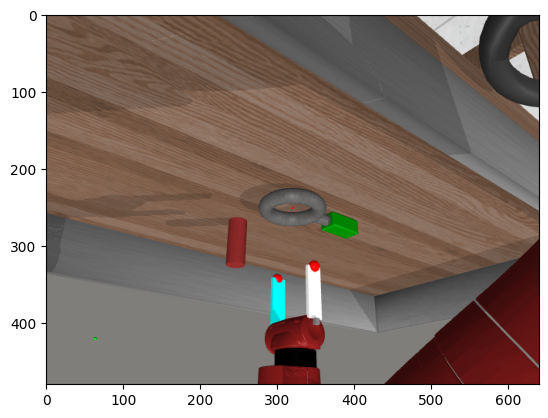

In [93]:
env = create_single_env("metaworld-assembly-v2", seed=7, image_based=False, goal_observable=False)

obs, info = env.reset()
print(obs)
# env_state = env.get_env_state()
img = env.render()

import torchvision.transforms as T
from PIL import Image

transforms = T.Compose(
    [T.Resize(256), T.CenterCrop(224), T.ToTensor()]
)  # ToTensor() divides by 255
transformed_img = transforms(Image.fromarray(img)).permute(1,2,0)
# img = ndimage.rotate(img, 180)
# plt.imshow(transformed_img)
plt.imshow(img)

# env.step(env.action_space.sample())

# fig = plt.figure(figsize=(10, 10))
# img = env.render()
# # img = ndimage.rotate(img, 180)
# plt.imshow(img)

In [58]:
from imitation.data import serialize
import os
root_dir  = "/scr/aliang80/changepoint_aug"
dataset_file = "datasets/expert_dataset/image_True_pretrained_True_r3m_resnet50_add_proprio_stack_3/metaworld-assembly-v2_100_noise_0"
print("load dataset from ", dataset_file)
dataset_file = os.path.join(root_dir, dataset_file)
expert_trajectories = serialize.load(dataset_file)
print("number of expert trajectories: ", len(expert_trajectories))


load dataset from  datasets/expert_dataset/image_True_pretrained_True_r3m_resnet50_add_proprio_stack_3/metaworld-assembly-v2_100_noise_0
number of expert trajectories:  100


/scr/aliang80/miniconda3/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [70]:
expert_trajectories[0].obs[0][:20]


array([0.        , 0.        , 0.03110715, 0.        , 0.        ,
       0.00048422, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00039503, 0.        , 0.        ,
       0.00295447, 0.00070038, 0.        , 0.00057419, 0.00938481])

In [71]:
expert_trajectories[0].obs[10][:20]


array([0.        , 0.        , 0.03110896, 0.        , 0.        ,
       0.00049902, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00039496, 0.        , 0.        ,
       0.00295355, 0.00069988, 0.        , 0.00059672, 0.00938371])

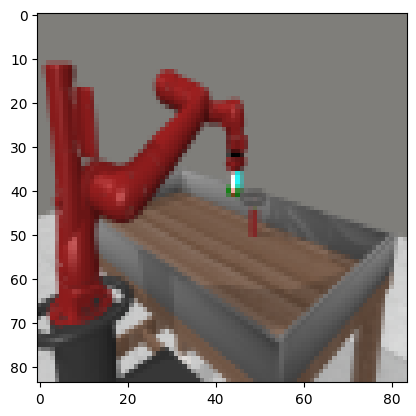

In [53]:
plt.imshow(expert_trajectories[1].obs[100, :3].transpose(1,2,0))

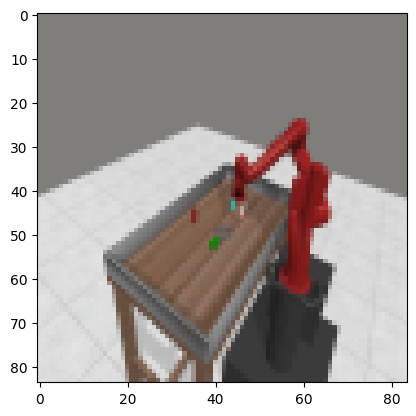

In [21]:
# expert_trajectories[0].obs.shape
# expert_trajectories[0].obs.max()
# print(len(expert_trajectories))
# print(expert_trajectories[0].obs[0].transpose(1,2,0))
plt.imshow(expert_trajectories[0].obs[1].transpose(1,2,0))

In [19]:
for indx in range(5, 10):
    print(indx)
    make_video_from_trajectory("metaworld-assembly-v2", expert_trajectories[indx], video_dir="/scr/aliang80/changepoint_aug/notebooks/results")

5
6
7
8
9


In [ ]:
cp_timesteps = []
for trajectory in expert_trajectories:
    num_timesteps = len(trajectory.obs)
    found_cp = False
    for timestep in range(num_timesteps):
        # get the steps right before picking up the object
        if (
            trajectory.infos[timestep]["grasp_reward"] > 0.4
            and not trajectory.infos[timestep]["grasp_success"]
        ):
            found_cp = True
            break
        # if trajectory.infos[timestep]["in_place_reward"] > 0.4:
        #     found_cp = True
        #     break
    if found_cp:
        cp_timesteps.append(timestep)
    else:
        cp_timesteps.append(-1)

In [ ]:
expert_trajectories[0].infos[23]

In [ ]:
env = create_single_env("metaworld-assembly-v2", seed=0, image_based=False, noise_std=0.3)
obs, _ = env.reset()
# print(obs.shape)
# print(obs)
prev_obs = expert_trajectories[0].infos[22]['state']
# print(prev_obs)
info = expert_trajectories[0].infos[23]
orig_state = expert_trajectories[0].infos[23]['state']
print(info["task"])
print(orig_state)
env.unwrapped._freeze_rand_vec = True
env.unwrapped._last_rand_vec = info["last_rand_vec"]
env.unwrapped._target_pos = info["task"]
env.reset_model()
qpos = info["qpos"]
qvel = info["qvel"]
env.reset_model()
env.set_env_state((qpos, qvel))
env.unwrapped._prev_obs = prev_obs
new_obs = env.unwrapped._get_obs()
print(new_obs)
img = env.render()
# print(img)
img = ndimage.rotate(img, 180)
plt.imshow(img)

In [ ]:
dir(env.unwrapped)

In [ ]:
env.unwrapped.evaluate_state(env.unwrapped._get_obs(), env.action_space.sample())

In [ ]:
for _ in range(10):
    rand_action = env.action_space.sample() * 0
    # rand_action[-1] = 0
    obs, _, _, _, _ = env.step(rand_action)

img = env.render()
img = ndimage.rotate(img, 180)
plt.imshow(img)

In [ ]:
# load trained BC policy

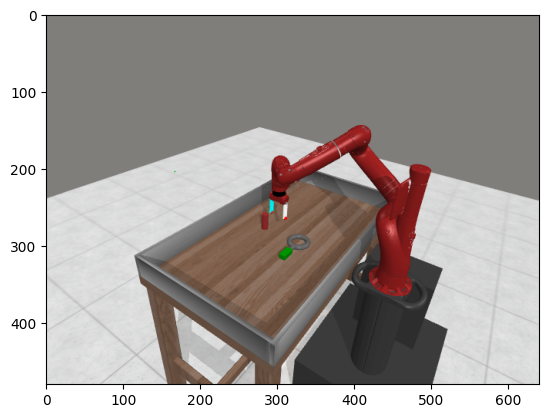

In [6]:
env_name = "metaworld-assembly-v2"

env = create_single_env(
    env_name,
    seed=19,
    image_based=False,
    noise_std=0,
    freeze_rand_vec=True,
)
# hello = env.reset()
# print(hello)
img = env.unwrapped.render(offscreen=True)
# img = ndimage.rotate(img, 180)
plt.imshow(img)
# qpos, qvel = env.get_env_state()
# print(qpos, qvel)
# last_rand_vec = env.unwrapped._last_rand_vec
# print(last_rand_vec)
# task = env.unwrapped._target_pos
# print(env.unwrapped._get_state_rand_vec())



In [ ]:
env = create_single_env(
    env_name,
    seed=22,
    image_based=False,
    noise_std=0,
    freeze_rand_vec=True,
)
# env2 = create_single_env(
#     env_name,
#     seed=23,
#     image_based=False,
#     noise_std=0,
#     freeze_rand_vec=True,
# )
# print(env.unwrapped._get_state_rand_vec())
# print(env.unwrapped._freeze_rand_vec)
# env.reset_model()
env.unwrapped._last_rand_vec = last_rand_vec
# env2.unwrapped._last_rand_vec = last_rand_vec

env.unwrapped._target_pos = task
env.set_env_state((qpos, qvel))
obs = env.reset_model()
# obs2 = env2.reset_model()

env.step(env.action_space.sample())
env.step(env.action_space.sample())

print(obs)
import mujoco

# mujoco.mj_forward(
#     env.unwrapped.model, env.unwrapped.data
# )
print()
# print(obs2) 
img = env.unwrapped.render(offscreen=True)
# img = ndimage.rotate(img, 180)
plt.imshow(img)
# print(env.action_space.sample())
# env.unwrapped.do_simulation(env.action_space.sample(), 1)